In [1]:
import stellar
import matplotlib.pyplot as plt

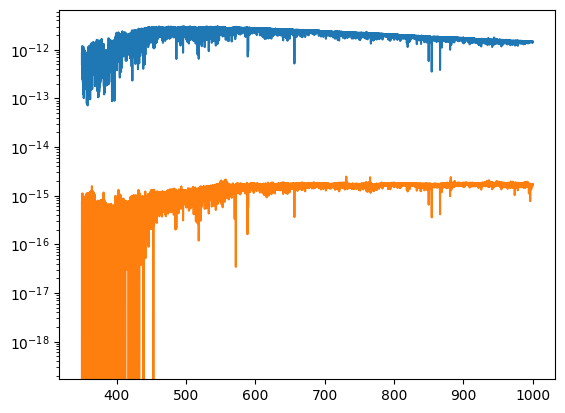

In [2]:
filenames = stellar.select_approriate_xsl_files()
filenames = filenames[:2]
for file in filenames:
    spectrum = stellar.load_spectrum(file)
    spectrum = stellar.find_range_in_spectrum(100, 1000, spectrum[0], spectrum[1])
    plt.plot(spectrum[0], spectrum[1])
plt.yscale('log')

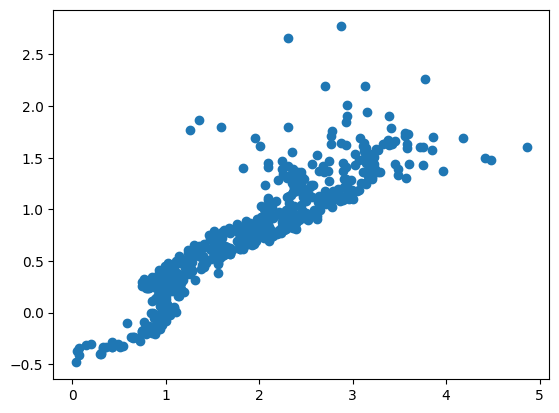

In [3]:
stellar.plot_xsl_colour_diagram()